In [14]:
from skimage import color
from skimage.morphology import disk
import Dataset

dataset_list = Dataset.get_full_dataset()

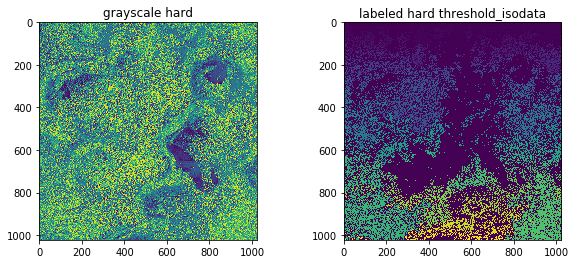

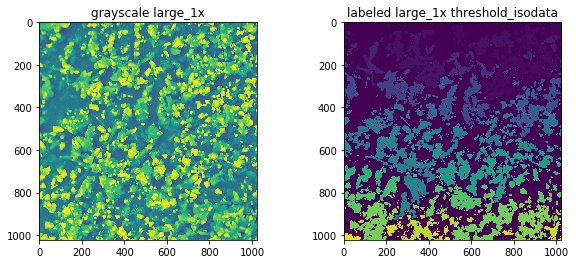

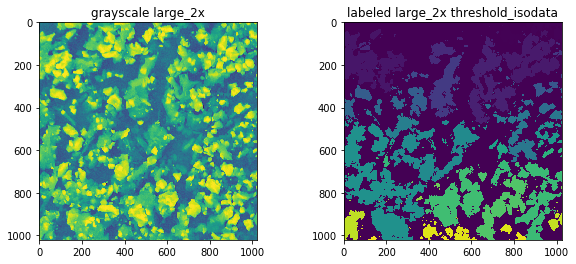

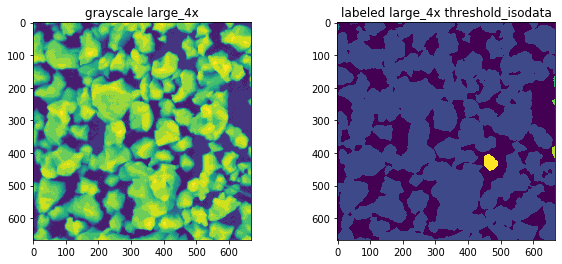

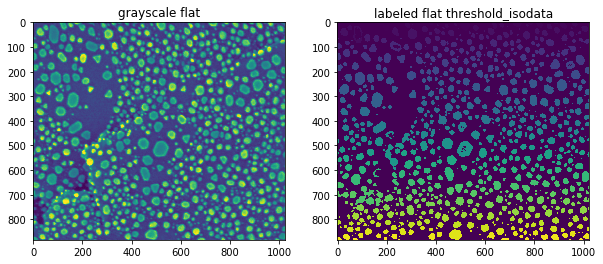

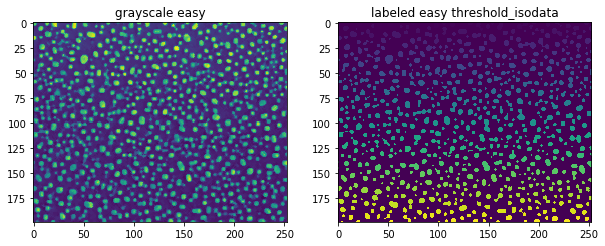

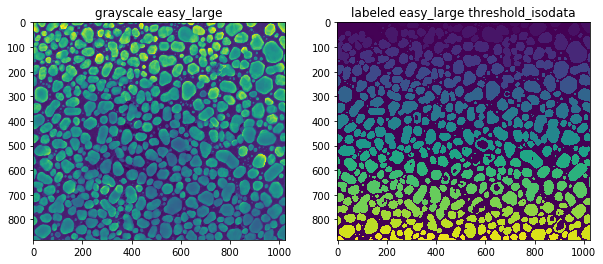

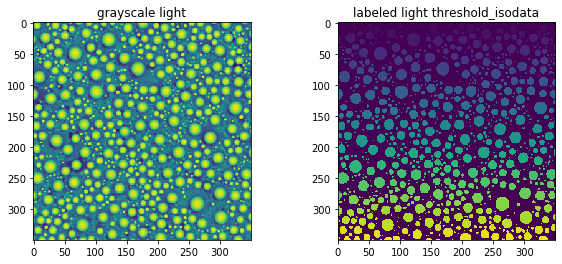

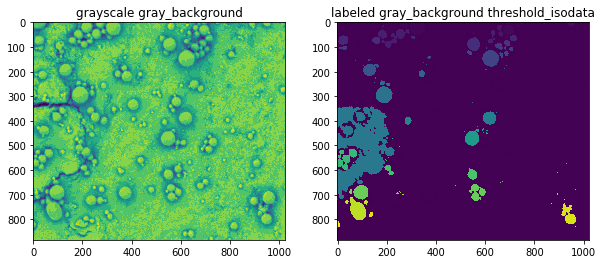

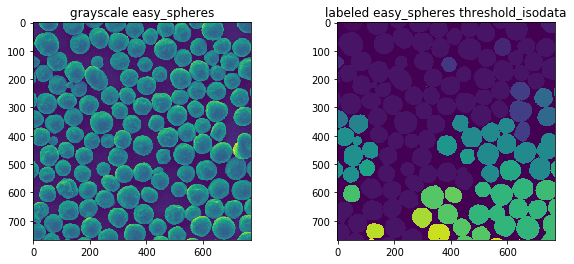

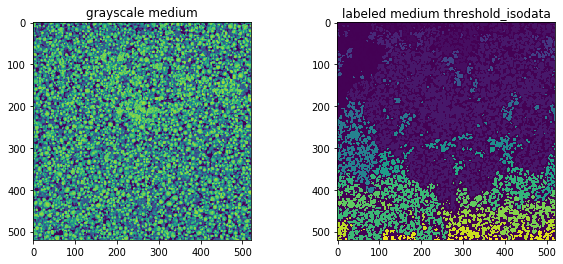

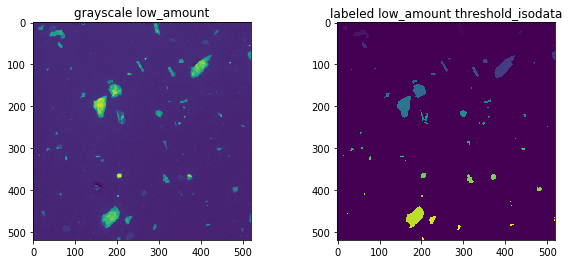

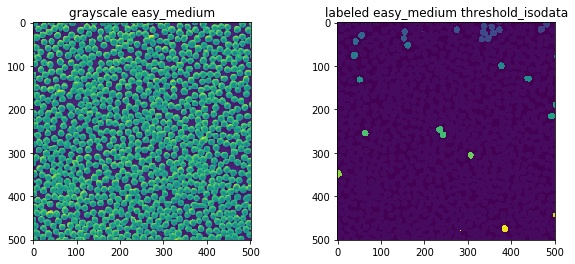

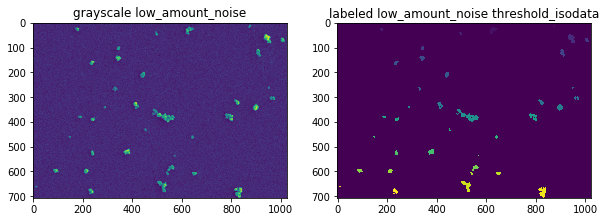

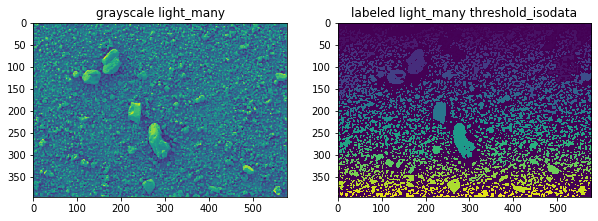

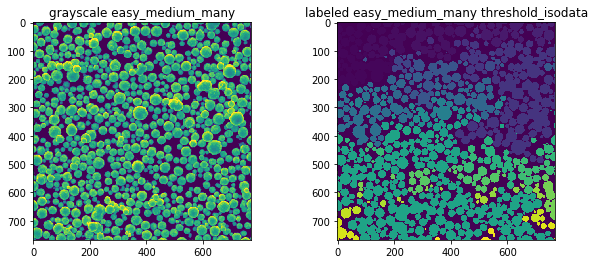

In [15]:
from skimage.filters import threshold_isodata, threshold_otsu, threshold_li, threshold_mean, \
    threshold_minimum, threshold_triangle, threshold_yen, threshold_niblack, rank
from scipy.ndimage import label
import matplotlib.pyplot as plot

log = []

for i, data in enumerate(dataset_list):
    image, title = data['image'], data['title']
    
    image = color.rgb2gray(image)
    image = rank.median(image, disk(2))          # denoise
    
    plot.figure(i+1, figsize=(10, 4))
    plot.subplot(121)
    plot.imshow(image)
    plot.title(f'grayscale {title}')
    
    threshold_function = threshold_isodata
    threshold_value = threshold_function(image)
    binary = image > threshold_value
    
    labeled, amount = label(binary)
    
    plot.subplot(122)
    plot.imshow(labeled)
    plot.title(f'labeled {title} {threshold_function.__name__}')
    
    log.append(f'amount {title} {threshold_function.__name__}: {amount}')
    
plot.show()

In [16]:
print(*log, sep='\n')


amount hard threshold_isodata: 8044
amount large_1x threshold_isodata: 1459
amount large_2x threshold_isodata: 1042
amount large_4x threshold_isodata: 9
amount flat threshold_isodata: 870
amount easy threshold_isodata: 732
amount easy_large threshold_isodata: 505
amount light threshold_isodata: 990
amount gray_background threshold_isodata: 386
amount easy_spheres threshold_isodata: 38
amount medium threshold_isodata: 518
amount low_amount threshold_isodata: 69
amount easy_medium threshold_isodata: 36
amount low_amount_noise threshold_isodata: 40
amount light_many threshold_isodata: 2139
amount easy_medium_many threshold_isodata: 178
